In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [17]:
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending"}, inplace=True)
df

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
selected_features = ["Income", "Spending"]
df[selected_features] = df[selected_features].fillna(df[selected_features].median())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])
df

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
import warnings
warnings.filterwarnings('ignore')
silhouette_scores = []
for k in range(2, 6):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append((k, score)) 
    print(f"Silhouette Score for {k} clusters: {score:.3f}")

Silhouette Score for 2 clusters: 0.321
Silhouette Score for 3 clusters: 0.467
Silhouette Score for 4 clusters: 0.494
Silhouette Score for 5 clusters: 0.555


In [29]:
best_k = max(silhouette_scores, key=lambda x: x[1])[0]  # Extract k from tuple
print(f"Best number of clusters: {best_k}")

Best number of clusters: 5


In [31]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled) 
df

,CustomerID,Genre,Age,Income,Spending,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [33]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)


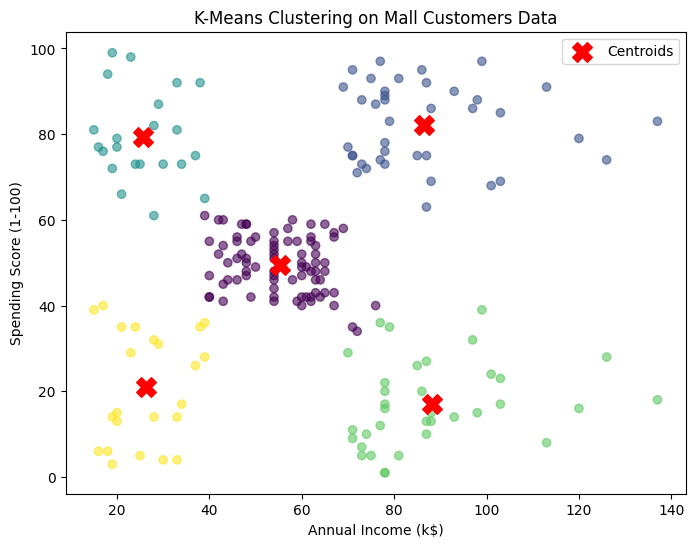

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Income"], df["Spending"], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering on Mall Customers Data")
plt.legend()
plt.show()